In [4]:
import pandas as pd 
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
att = np.array(pd.read_csv('data/attributes.csv'))
att

array([[0, 'l'],
       [1, 'x'],
       [2, 'x'],
       ...,
       [1497, 'l'],
       [1498, 'f'],
       [1499, 'l']], dtype=object)

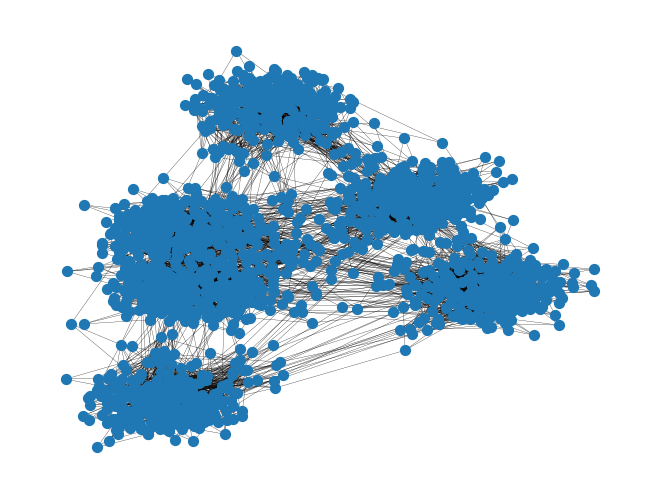

In [26]:
G = nx.read_edgelist('data/edges_train.edgelist', data=False, delimiter=',', nodetype=int)
nx.draw(G, node_size=50, width=0.2)

In [27]:
G.number_of_nodes(), G.number_of_edges()

(1500, 6600)

#### setting:
we have an edgelist containing 6600 links of 1500 nodes and an attribute list containing 1500 nodes with a corresponding level of a categorical attribute variable.
#### aim:
predict the missing links -> should amount to being 7333 links

# Implementation of all possible Link Prediction metrics from networkx

In [38]:
# Input: getFeature(graph, node_i, node_j)
def getFeatures(G, i, j):
    # ressource allocation index
    ra = list(nx.resource_allocation_index(G, [(i, j)]))[0][2]
    
    # jaccard coefficient
    jc = list(nx.jaccard_coefficient(G, [(i, j)]))[0][2]
    
    # adamic adar index
    aa = list(nx.adamic_adar_index(G, [(i, j)]))[0][2]
    
    # preferential attachment
    pa = list(nx.preferential_attachment(G, [(i, j)]))[0][2]
    
    # #common neighbors soundarajan hopcroft
    # sh = list(nx.cn_soundarajan_hopcroft(G, [(i, j)]))[0][2]

    # #ra index soundarajan hopcroft
    # rai = list(nx.ra_index_soundarajan_hopcroft(G, [(i, j)]))[0][2]

    # #within inter cluster
    # wic = list(nx.within_inter_cluster(G, [(i, j)]))[0][2]

    # amou8nt of common neighbors -> TODO: same as soundarajan hopcroft????
    cn = len(list(nx.common_neighbors(G, i, j)))


    return [ra, jc, aa, pa, cn]

In [39]:
features = []

for (i, j) in G.edges:
    features.append(getFeatures(G, i, j))

In [42]:
num_rows = len(features)
num_cols = len(features[0]) if features else 0
print(f"Dimensions of features: {num_rows} rows, {num_cols} columns")

Dimensions of features: 6600 rows, 5 columns
